## 决策树对 iris 数据的分类

In [28]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz
import graphviz
from pydotplus.graphviz import graph_from_dot_data
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']

In [2]:
# 加载Iris数据集
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
# 数据集划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# 初始化决策树分类器
clf = DecisionTreeClassifier()

# 在训练集上训练模型
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [5]:
# 在测试集上进行预测
y_pred = clf.predict(X_test)

# 计算准确度
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 1.0


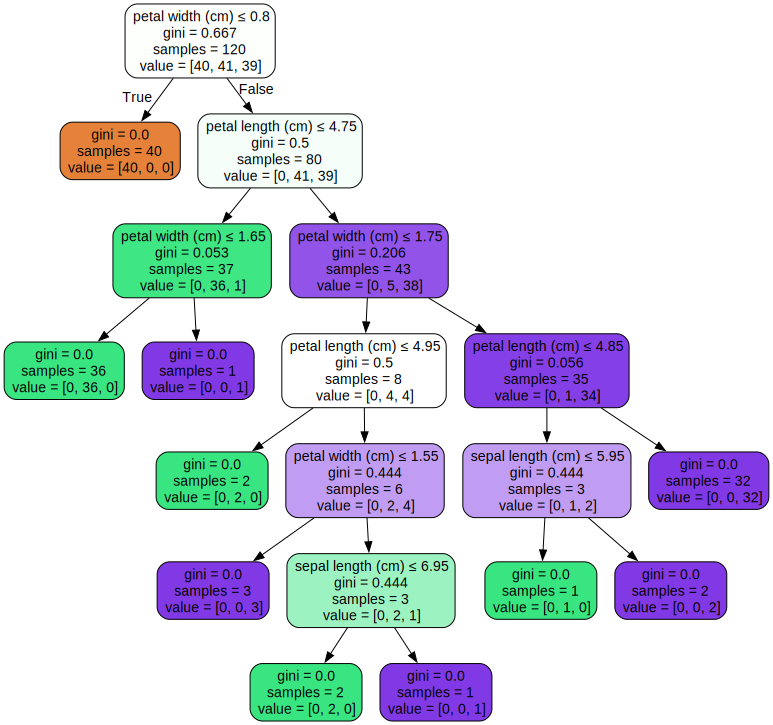

In [6]:
dot_data = export_graphviz(clf, out_file=None, feature_names=iris.feature_names, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("iris_decision_tree")  # 保存为PDF或其他格式
graph.format = 'png'
graph.render("decision_tree", format='png', cleanup=True)  # 保存为decision_tree.png
graph

In [7]:
# 输出决策树的一些参数
print(f'Decision Tree Parameters: {clf.get_params()}')

Decision Tree Parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


查阅资料，各参数的含义如下：
* ccp_alpha：定义了用于剪枝的代价复杂性参数的阈值
* class_weight：为不同的类别赋予不同的权重
* criterion：表示划分数据集的准则。可以选择 "gini"（基尼系数）或 "entropy"（信息增益）
* max_depth：树的最大深度。用于防止树在训练过程中变得过拟合
* max_features：寻找最佳分裂时考虑的特征数量。可以是整数（考虑的特征数量）或浮点数（考虑的特征比例）
* max_leaf_nodes：指定最大叶子节点数目，用于防止过拟合
* min_impurity_decrease：在进行节点分裂时，只有当节点的分裂导致不纯度减少值大于等于指定的阈值时，才进行分裂
* min_samples_leaf：叶子节点必须具有的最小样本数
* min_samples_split：规定了一个节点在分裂之前必须包含的最小样本数
* min_weight_fraction_leaf：叶子节点上的最小样本权重和

In [8]:
# 获取训练好的树的深度
tree_depth = clf.tree_.max_depth
tree_depth

6

In [9]:
# 定义决策树分类器
def train_decision_tree(max_depth=None, max_leaf_nodes=None, max_features=None, min_samples_split=2, min_samples_leaf=1):
    clf = DecisionTreeClassifier(max_depth=max_depth, max_leaf_nodes=max_leaf_nodes, max_features=max_features, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
    clf.fit(X_train, y_train)
    return clf

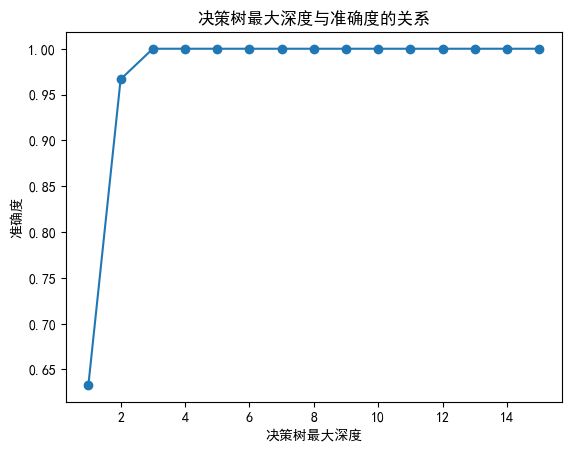

In [10]:
depth_range = range(1, 16)
accuracy_scores = []

for depth in depth_range:
    clf = train_decision_tree(max_depth=depth)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# 绘制深度与准确度的关系图
plt.plot(depth_range, accuracy_scores, marker='o')
plt.title('决策树最大深度与准确度的关系')
plt.xlabel('决策树最大深度')
plt.ylabel('准确度')
plt.show()

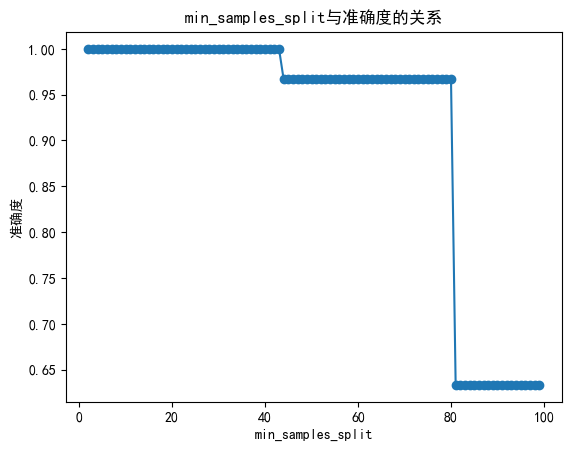

In [11]:
# 探究min_samples_split对实验结果的影响
split_range = range(2, 100)
accuracy_scores_split = []

for split_value in split_range:
    clf = train_decision_tree(min_samples_split=split_value)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores_split.append(accuracy)

# 绘制min_samples_split与准确度的关系图
plt.plot(split_range, accuracy_scores_split, marker='o')
plt.title('min_samples_split与准确度的关系')
plt.xlabel('min_samples_split')
plt.ylabel('准确度')
plt.show()


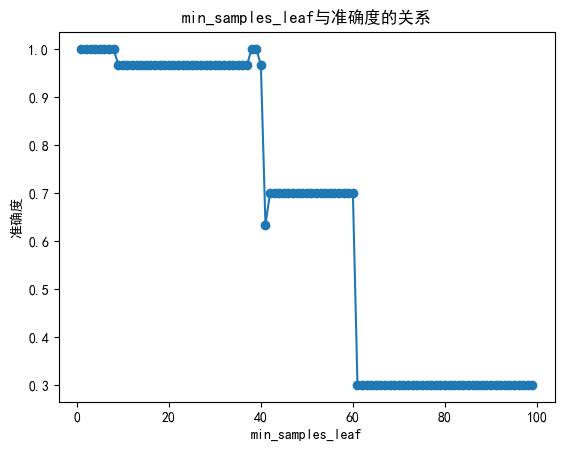

In [12]:
# 探究min_samples_leaf对实验结果的影响
leaf_range = range(1, 100)
accuracy_scores_leaf = []

for leaf_value in leaf_range:
    clf = train_decision_tree(min_samples_leaf=leaf_value)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores_leaf.append(accuracy)

# 绘制min_samples_leaf与准确度的关系图
plt.plot(leaf_range, accuracy_scores_leaf, marker='o')
plt.title('min_samples_leaf与准确度的关系')
plt.xlabel('min_samples_leaf')
plt.ylabel('准确度')
plt.show()

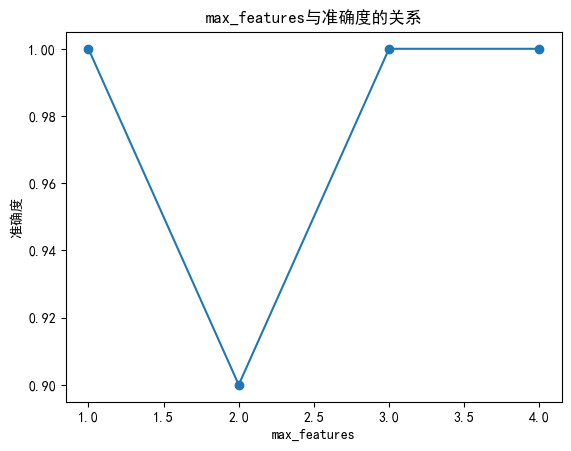

In [13]:
# 探究max_features对实验结果的影响
features_range = range(1, X.shape[1] + 1)
accuracy_scores_features = []

for feature_value in features_range:
    clf = train_decision_tree(max_features=feature_value)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores_features.append(accuracy)

# 绘制max_features与准确度的关系图
plt.plot(features_range, accuracy_scores_features, marker='o')
plt.title('max_features与准确度的关系')
plt.xlabel('max_features')
plt.ylabel('准确度')
plt.show()


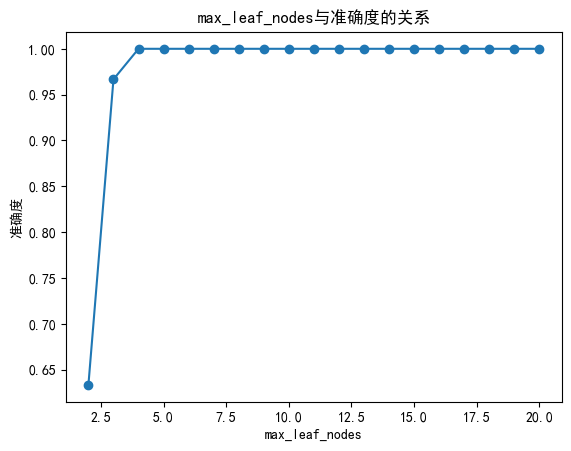

In [14]:
# 探究max_leaf_nodes对实验结果的影响
leaf_nodes_range = range(2, 21)
accuracy_scores_leaf_nodes = []

for leaf_nodes_value in leaf_nodes_range:
    clf = train_decision_tree(max_leaf_nodes=leaf_nodes_value)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores_leaf_nodes.append(accuracy)

# 绘制max_leaf_nodes与准确度的关系图
plt.plot(leaf_nodes_range, accuracy_scores_leaf_nodes, marker='o')
plt.title('max_leaf_nodes与准确度的关系')
plt.xlabel('max_leaf_nodes')
plt.ylabel('准确度')
plt.show()

## 决策树完成数据集的非线性分类（data：LR-testSet2.txt）

In [15]:
import numpy as np


file_path = 'D:\\BaiduSyncdisk\\机器学习\\shangji\\data\\LR-testSet2.txt'

# 读取数据到NumPy数组
data_matrix = np.loadtxt(file_path, dtype=float, usecols=(0, 1, 2), delimiter=',')

In [16]:
X_data = data_matrix[:, 0:2]
y_data = data_matrix[:, 2]

In [17]:
# 数据集划分
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [18]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

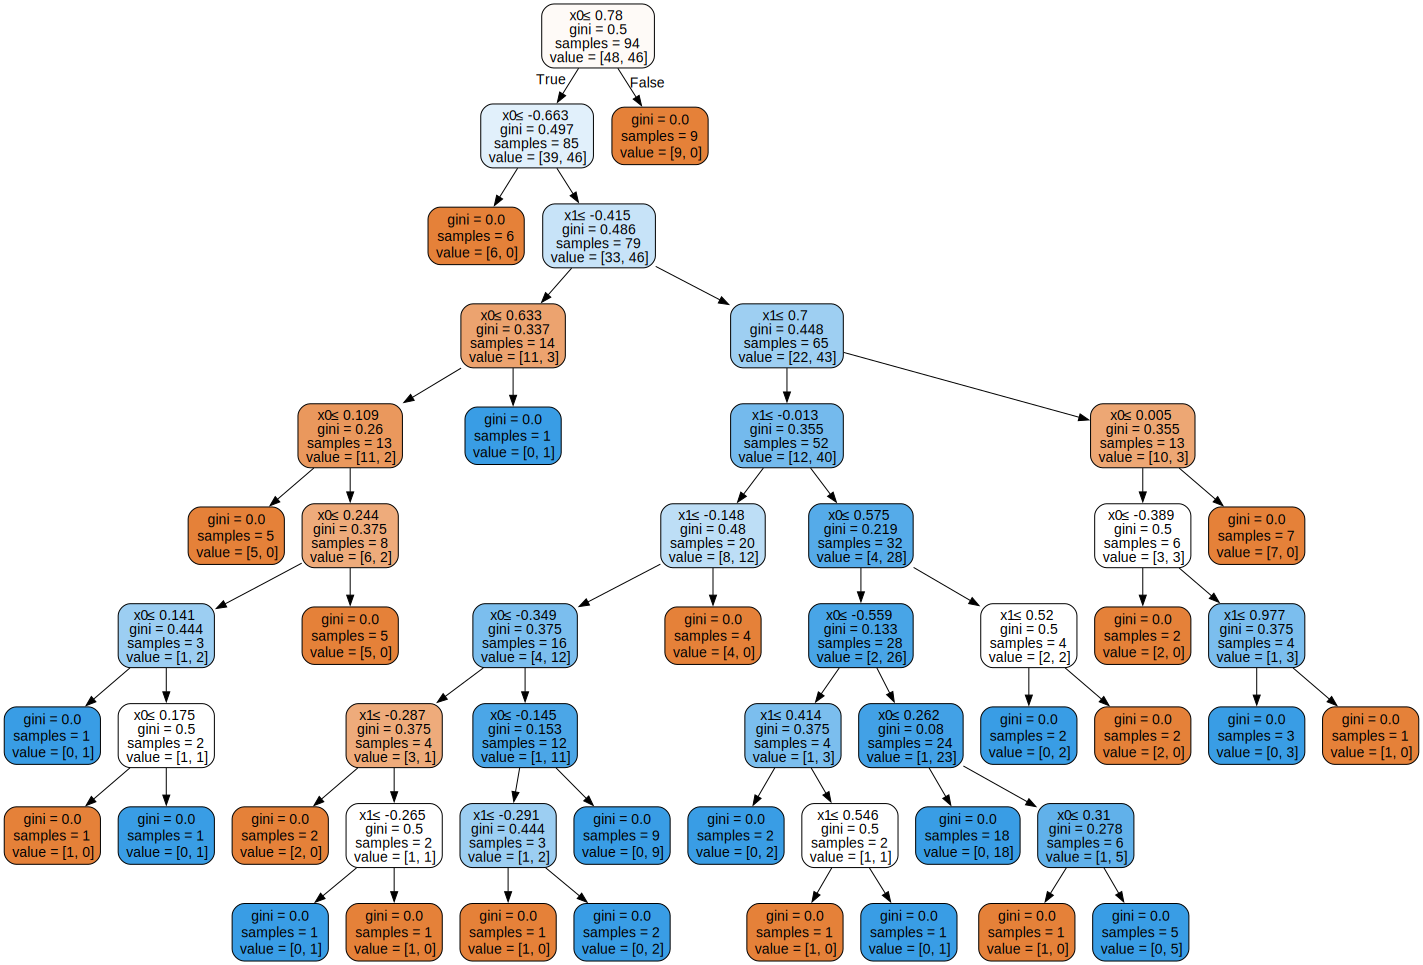

In [19]:
dot_data = export_graphviz(classifier, out_file=None, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("iris_decision_tree")  # 保存为PDF或其他格式
graph.format = 'png'
graph.render("decision_tree", format='png', cleanup=True)  # 保存为decision_tree.png
graph

In [20]:
y_pred = classifier.predict(X_test)

# 计算准确度
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7083333333333334


修改最大深度的参数为4，重新训练并在测试集上测试

In [21]:
classifier_1 = DecisionTreeClassifier(max_depth=4)
classifier_1.fit(X_train, y_train)

y_pred = classifier_1.predict(X_test)

# 计算准确度
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7916666666666666


模型在测试集上准确率提高，之前的模型过拟合

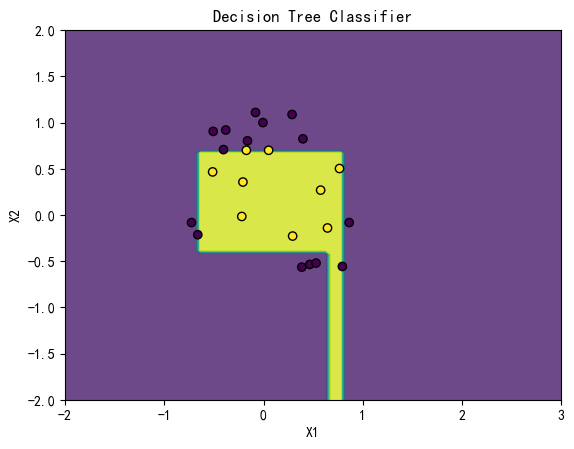

In [31]:
plt.rcParams['axes.unicode_minus']=False

# 创建网格点用于绘制决策边界
xx, yy = np.meshgrid(np.linspace(-2, 3, 100),
                     np.linspace(-2, 2, 100))
Z = classifier_1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 绘制数据点和决策边界
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, edgecolors='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Tree Classifier')
plt.show()

生成数据

In [38]:
from sklearn import datasets

x1, y1 = datasets.make_circles(n_samples=2000, factor=0.5, noise=0.05, random_state=1017)
x2, y2 = datasets.make_blobs(n_samples=1000, centers=[[1.2,1.2]], cluster_std=[[.1]], random_state=1017)

y2 = np.full_like(y2, 2)

# 将向量纵向拼接
x_all = np.vstack((x1, x2)) 
y_all = np.concatenate((y1, y2))

In [39]:
# 数据集划分
X_train, X_test, y_train, y_test = train_test_split(x_all, y_all, test_size=0.2, random_state=1017)

In [40]:
cclf = DecisionTreeClassifier()
cclf.fit(X_train, y_train)

y_pred = cclf.predict(X_test)

# 计算准确度
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9966666666666667


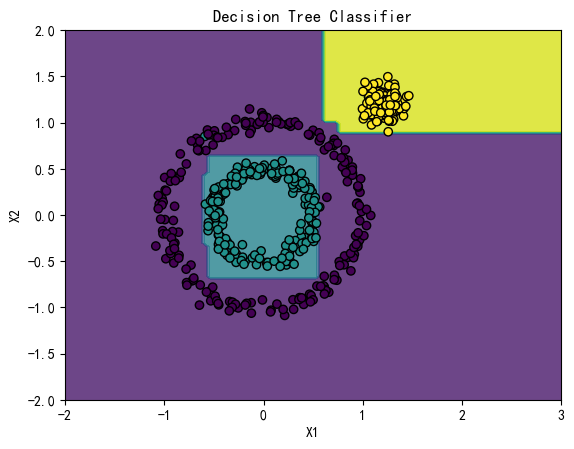

In [41]:
plt.rcParams['axes.unicode_minus']=False

# 创建网格点用于绘制决策边界
xx, yy = np.meshgrid(np.linspace(-2, 3, 100),
                     np.linspace(-2, 2, 100))
Z = cclf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 绘制数据点和决策边界
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, edgecolors='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Tree Classifier')
plt.show()